# Final Project - Azka Nur Afifah

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import seaborn as sns
import re
import pyodbc
import gspread
import matplotlib.dates as mdates
from datetime import datetime
sns.set()
from collections import Counter
from IPython.display import display
import json
from io import StringIO

import sys
sys.path.append(r'C:\Users\azuka\Documents\Python Scripts\common_functions')
from common_functions import check_values, make_connection, update_sheet, get_sheet, replace_columns

# load dataset

In [2]:
df_household = pd.read_stata(r'C:\Users\azuka\Documents\Materials\Non Degree\06 Stats for Business\Final Project\DHS Standard\IDHR71DT\IDHR71FL.DTA')
df_household.shape

(47963, 1283)

In [3]:
df_women = pd.read_stata(r'C:\Users\azuka\Documents\Materials\Non Degree\06 Stats for Business\Final Project\DHS Standard\IDIR71DT\IDIR71FL.DTA', convert_categoricals=False)
sr = pd.io.stata.StataReader(r'C:\Users\azuka\Documents\Materials\Non Degree\06 Stats for Business\Final Project\DHS Standard\IDIR71DT\IDIR71FL.DTA')
vl = sr.value_labels()
sr.close()
df_women.shape

(49627, 5491)

In [4]:
df_women_recode = df_women.copy()

In [5]:
# value_list = [i for i in vl.keys()]
# for i in value_list:
#     if i.lower() in df_women_recode.columns:
#         df_women_recode[i.lower()] = df_women_recode[i.lower()].map(vl[i])

In [181]:
import pickle 

with open('saved_value_list.pkl', 'wb') as f:
    pickle.dump(vl, f)
        
# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [5]:
df_women_recode

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,s524_3,s524_4,s524_5,s524_6,s630o_1,s630o_2,s630o_3,s630o_4,s630o_5,s630o_6
0,1 2 2,ID7,1,2,2,1,454859,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 2 3,ID7,1,2,3,1,454859,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 3 2,ID7,1,3,2,1,454859,8,2017,1412,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1 4 2,ID7,1,4,2,1,454859,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 6 4,ID7,1,6,4,1,454859,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49622,197021 1,ID7,1970,21,1,1970,937556,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49623,197023 2,ID7,1970,23,2,1970,937556,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49624,197024 4,ID7,1970,24,4,1970,937556,8,2017,1412,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
49625,197024 7,ID7,1970,24,7,1970,937556,8,2017,1412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_women_recode['hhid'] = df_women_recode.v001.astype('str') + '_' + df_women_recode.v002.astype('str')
df_women_recode.hhid.nunique()

36944

In [7]:
df_women['hhid'] = df_women.v001.astype('str') + '_' + df_women.v002.astype('str')
df_women.hhid.nunique()

36944

In [8]:
df_household['hhid_key'] = df_household.hv001.astype('str') + '_' + df_household.hv002.astype('str')
df_household.hhid_key.nunique()

47963

In [9]:
set(df_women_recode.hhid) - set(df_household.hhid_key)

set()

In [11]:
# cols_first_marriage = range(507,514)
# df_first_marriage = df_women_recode[['caseid','hhid']+['v' + str(i) for i in cols_first_marriage]]
# df_first_marriage.head()

,caseid,hhid,v507,v508,v509,v510,v511,v512,v513
0,1 2 2,1_2,5.0,1997.0,1169.0,month and year - information complete,19.0,20.0,20-24
1,1 2 3,1_2,NaN,NaN,NaN,NaN,NaN,NaN,never married
2,1 3 2,1_3,12.0,2003.0,1248.0,month and year - information complete,16.0,13.0,10-14
3,1 4 2,1_4,2.0,2004.0,1250.0,year - age/month imputed,17.0,13.0,10-14
4,1 6 4,1_6,5.0,2013.0,1361.0,month and year - information complete,34.0,4.0,0-4


In [10]:
df_women.shape

(49627, 5492)

In [11]:
cols_identity = {'caseid':'',
                 'hhid':'',
                 'v012':'current age',
                 'v013':'current age group',
                 
                 'v022':'province urban vs rural',
                 'v024':'province',
                 'v025':'urban vs rural',
                 's108':'highest education lvl',
                 'v106':'highest education grouped',
                 'v130':'religion',
                #  'v149':'educational achievement',
                 
                #  'v190':'wealth index',
                 
                 'v201':'total number of children ever born',
                 'v212':'age at first birth',
                 'v228':'ever had terminated pregnancy',
                 
                 'v625a':'unmet planning - exposure to need of contraception',
                 'v626a':'unmet planning - unmet need',
                 'v632':'women in union and using contraception are asked who decided on the use of contraception',
                 'v632a':'women in union, not using contraception and not pregnant are asked who decided on the non-use of contraception',
                 
                 'v501':'current marital status',
                 'v502':'currently, ever or formerly married',
                 'v511':'age at first marriage',
                 'v512':'years since first marriage',
                 'v513':'years since first marriage, grouped',
                 
                 'v744a':'beatings - going out wo telling',
                 'v744b':'beatings - neglects the children',
                 'v744c':'beatings - argues',
                 'v744d':'beatings - refuses to have sex',
                 'v744e':'beatings - burns the food'}

In [12]:
cols_identity_women = {'caseid':'',
                       'v133':'total education in years',
                       'v149':'educational achievement',
                       'v190':'wealth quintiles',
                       'v191':'wealth national score',
                       
                       'v744a':'beatings - going out wo telling',
                       'v744b':'beatings - neglects the children',
                       'v744c':'beatings - argues',
                       'v744d':'beatings - refuses to have sex',
                       'v744e':'beatings - burns the food'}

In [13]:
df_raw = pd.merge(df_women_recode[[i for i in cols_identity.keys()][:-5]],
                  df_women[cols_identity_women],
                  on='caseid')
df_raw.shape

(49627, 31)

In [26]:
value_list = [i for i in vl.keys()]
for i in value_list:
    if i.lower() in df_raw[[i for i in cols_identity.keys()][:-5]].columns:
        df_raw[i.lower()] = df_raw[i.lower()].map(vl[i])

# feature engineering

## beatings

In [27]:
df_raw['beatings_lvl'] = np.where(((df_raw.v744a + df_raw.v744b + df_raw.v744c + df_raw.v744d + df_raw.v744e) > 5) |\
        ((df_raw.v744a + df_raw.v744b + df_raw.v744c + df_raw.v744d + df_raw.v744e).isna()),\
            np.nan,df_raw.v744a + df_raw.v744b + df_raw.v744c + df_raw.v744d + df_raw.v744e)
df_raw.beatings_lvl.value_counts(dropna=False)

0.0    30649
1.0     6902
2.0     5759
NaN     2700
3.0     2271
4.0      891
5.0      455
Name: beatings_lvl, dtype: int64

In [28]:
df_raw['beatings'] = np.where(df_raw.beatings_lvl>0,1, np.where(df_raw.beatings_lvl.isna(), np.nan, 0))
df_raw.beatings.value_counts(dropna=False)

0.0    30649
1.0    16278
NaN     2700
Name: beatings, dtype: int64

## married

In [16]:
df_raw.v502.value_counts(dropna=False)

1    34467
0    12701
2     2459
Name: v502, dtype: int64

In [29]:
df_raw['ever_married'] = np.where(df_raw.v502=='never in union',0,1)
df_raw.ever_married.value_counts()

1    36926
0    12701
Name: ever_married, dtype: int64

## child marriage

In [18]:
df_raw[(df_raw.ever_married==1) & (df_raw.v511<16)].shape

(4044, 34)

In [30]:
df_raw['child_marriage'] = np.where(df_raw.v511<16,1, np.where(df_raw.v511.isna(),np.nan, 0))
df_raw.child_marriage.value_counts(dropna=False)

0.0    32882
NaN    12701
1.0     4044
Name: child_marriage, dtype: int64

In [31]:
df_raw.child_marriage.value_counts(normalize=True)

0.0    0.890484
1.0    0.109516
Name: child_marriage, dtype: float64

Women who married at young age (<16 yo) are more likely to accept justification of husband's beatings (37.7% vs 32.8%)

In [32]:
df_raw[df_raw.ever_married==1].groupby(['child_marriage','beatings']).size().to_frame()

0
child_marriage beatings       
0.0            0.0       21370
               1.0       10427
1.0            0.0        2400
               1.0        1454

In [114]:
df_raw[df_raw.ever_married==1].groupby(['beatings']).size()

beatings
0.0    23770
1.0    11881
dtype: int64

In [115]:
df_raw.groupby(['v106','beatings']).size()

v106          beatings
higher        0.0          6181
              1.0          2581
no education  0.0           540
              1.0           275
primary       0.0          7587
              1.0          4070
secondary     0.0         16341
              1.0          9352
dtype: int64

In [116]:
df_raw.groupby(['s108','beatings']).size()

s108                 beatings
academy/di/dii/diii  0.0          1479
                     1.0           584
div/university       0.0          4702
                     1.0          1997
junior high school   0.0          5655
                     1.0          3306
no education         0.0           540
                     1.0           275
primary              0.0          7587
                     1.0          4070
senior high school   0.0         10686
                     1.0          6046
dtype: int64

In [33]:
df_raw[df_raw.ever_married==1].to_csv('df_raw_ever_married.csv',index=False)

# EDA

In [62]:
sns.set_context('talk')

In [34]:
df_married = pd.read_csv('df_raw_ever_married.csv')
df_married.shape

(36926, 35)

In [216]:
with open('saved_value_list.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [48]:
df_married[(df_married.v024.str.contains('java')) | (df_married.v024.isin(['banten','jakarta','yogyakarta']))].shape

(12540, 35)

## age group

Most married women repondents came from 35-39 age group. A small percentage of 1.98% is in 15-19 age group.

In [25]:
df_married.v013

0        5
1        1
2        4
3        4
4        5
        ..
49622    6
49623    6
49624    2
49625    3
49626    3
Name: v013, Length: 49627, dtype: int64

In [35]:
df_married[(df_married.v013=='15-19')].caseid.nunique() / df_married.caseid.nunique()

0.019769268266262255

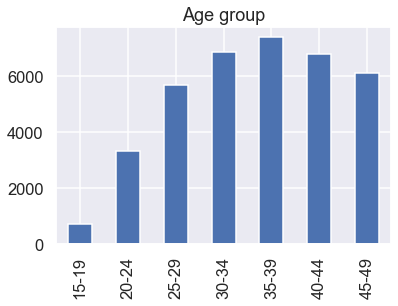

In [161]:
df_married.v013.value_counts().sort_index().plot.bar()
plt.title('Age group')
plt.savefig('age group all.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

## wealth distribution

Wealth index factor score is based on ownership of selected assets, materials for housing construction, etc.

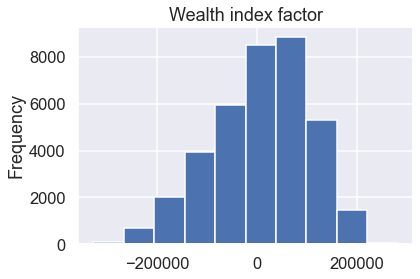

In [160]:
df_married.v191.plot.hist()
plt.title('Wealth index factor')
plt.savefig('wealth index factor all.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

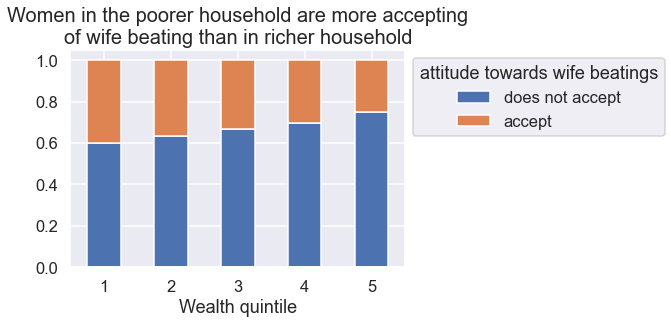

In [159]:
df_married.groupby('v190')['beatings'].value_counts(normalize=True).unstack('beatings').plot.bar(stacked=True)
plt.xlabel('Wealth quintile')
plt.xticks(rotation=0)
plt.title('Women in the poorer household are more accepting\nof wife beating than in richer household', fontdict={'fontsize':20})
plt.legend(['does not accept','accept'], title='attitude towards wife beatings',bbox_to_anchor=(1.8, 1),loc="upper right")
plt.savefig('poorest vs richest household vs beatings.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

In [26]:
vl['V190']

{1: 'poorest', 2: 'poorer', 3: 'middle', 4: 'richer', 5: 'richest'}

## urban/rural residence

There are slightly more women living in urban areas in this survey compared to rural areas.

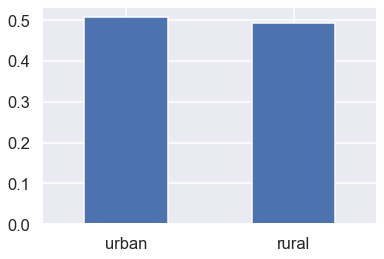

In [153]:
df_married.v025.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.savefig('urban vs rural all.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

Women living in rural areas are more accepting of wife beating than woman in urban areas.

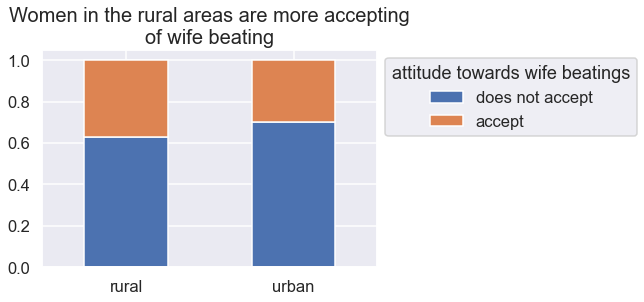

In [154]:
df_married.groupby('v025')['beatings'].value_counts(normalize=True).unstack('beatings').plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Women in the rural areas are more accepting\nof wife beating', fontdict={'fontsize':20})
plt.legend(['does not accept','accept'], title='attitude towards wife beatings',bbox_to_anchor=(1.8, 1),loc="upper right")
plt.savefig('urban vs rural vs beatings.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

## educational achievement

In [54]:
vl['V149']

{0: 'no education',
 1: 'incomplete primary',
 2: 'complete primary',
 3: 'incomplete secondary',
 4: 'complete secondary',
 5: 'higher'}

In [102]:
df_married.sort_values('v149').v149.map(vl['V149']).value_counts(normalize=True)

complete secondary      0.275009
incomplete secondary    0.244002
complete primary        0.217543
higher                  0.145453
incomplete primary      0.096111
no education            0.021882
Name: v149, dtype: float64

Only 42% women have completed at least secondary education.

In [110]:
df_married[df_married.v149.isin([4,5])].caseid.nunique() / len(df_married)

0.42046254671505173

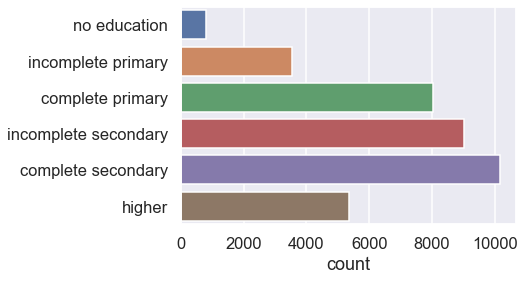

In [155]:
sns.countplot(y=df_married.sort_values('v149').v149.map(vl['V149']))
plt.ylabel('')
plt.savefig('educational achievement all.png'.replace(' ','_'), bbox_inches='tight')

Women with higher education are relatively not as accepting of wife beatings compared with other educational achievement.

In [178]:
df_married[df_married.v149==5].beatings.value_counts(normalize=True)

0.0    0.72748
1.0    0.27252
Name: beatings, dtype: float64

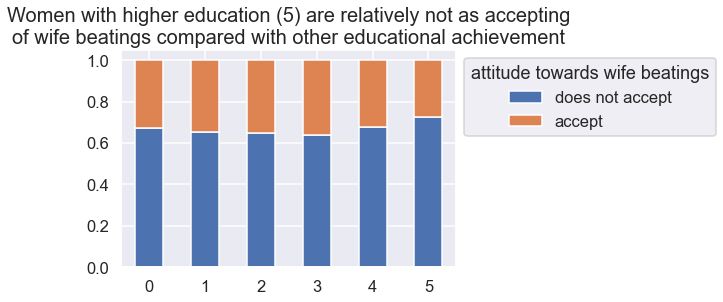

In [179]:
df_married.groupby('v149')['beatings'].value_counts(normalize=True).unstack('beatings').plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Women with higher education (5) are relatively not as accepting\nof wife beatings compared with other educational achievement', fontdict={'fontsize':20})
plt.legend(['does not accept','accept'], title='attitude towards wife beatings',bbox_to_anchor=(1.8, 1),loc="upper right")
plt.savefig('educational achievement vs beatings.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

## child marriage

As much as 10.95% respondents first got married at age below 16.

In [114]:
df_married.child_marriage.value_counts(normalize=True)

0.0    0.890484
1.0    0.109516
Name: child_marriage, dtype: float64

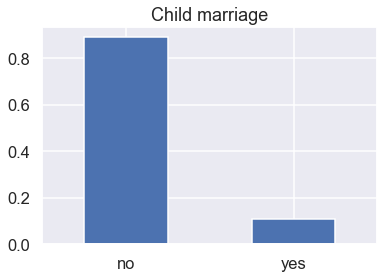

In [63]:
df_married.child_marriage.map({0:'no',1:'yes'}).value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.title('Child marriage')
plt.savefig('child marriage all.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

Women who got married at young age are slightly more accepting of wife beatings (37.73% vs 32.79%)

In [73]:
df_married[(df_married.child_marriage==1) & (df_married.v013.isin(['15-19','20-24']))].beatings.value_counts(normalize=True)

0.0    0.534
1.0    0.466
Name: beatings, dtype: float64

In [66]:
df_married[(df_married.child_marriage==0) & (df_married.v013.isin(['15-19','20-24']))].beatings.value_counts(normalize=True)

0.0    0.613263
1.0    0.386737
Name: beatings, dtype: float64

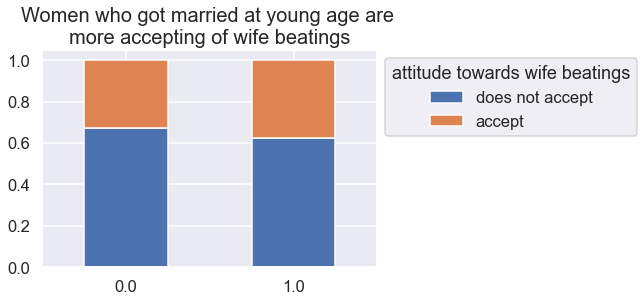

In [78]:
df_married.groupby('child_marriage')['beatings'].value_counts(normalize=True).unstack('beatings').plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Women who got married at young age are \nmore accepting of wife beatings', fontdict={'fontsize':20})
plt.legend(['does not accept','accept'], title='attitude towards wife beatings',bbox_to_anchor=(1.8, 1),loc="upper right")
plt.savefig('child marriage vs beatings.png'.replace(' ','_'), bbox_inches='tight')
plt.show()

# Statistical test

In [166]:
from statsmodels.stats.proportion import proportions_ztest

In [170]:
alpha = 0.05

In [167]:
child_beatings = df_married[(df_married.child_marriage==1) & (df_married.beatings==1)].caseid.nunique()
nonchild_beatings = df_married[(df_married.child_marriage==0) & (df_married.beatings==1)].caseid.nunique()

In [168]:
n_child = df_married[df_married.child_marriage==1].caseid.nunique()
n_nonchild = df_married[df_married.child_marriage==0].caseid.nunique()

In [169]:
test_stat, p_value = proportions_ztest(count = [child_beatings, nonchild_beatings], 
                                                nobs = [n_child, n_nonchild], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

The computed Z test statistic is:  5.452
The p-value is:  0.0


In [171]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


z test statistic > z critical -> reject the null hypothesis

p value < alpha -> reject the null hypothesis

In [175]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = child_beatings, nobs1 = n_child,
                                                 count2 = nonchild_beatings, nobs2 = n_nonchild, 
                                                 compare='diff', alpha=alpha)
print(confidence_interval)

(0.026945050798155054, 0.05817641130353762)


This shows that 95% of the time, women who got married at young age are more likely to justify wife beatings compared to those who didn't by 2.69% - 5.82%. This might not prove to be practically significant, so we will not be using this feature.